- Nome: ITAMARANDIBA
- Codigo Estacao: 83488
- Latitude: -17.85972222
- Longitude: -42.85277777
- Altitude: 919.37
- Situacao: Operante
- Data Inicial: 2019-01-01
- Data Final: 2023-12-31
- Periodicidade da Medicao: Diaria

In [1]:
import pandas as pd

df = pd.read_csv('chuva_itamarandiba.csv', sep=';')
df = df.iloc[:, :-1]
df = df.fillna(0)
df.columns = ['data', 'precipitacao(mm)']

j = 1
df['week'] = 0
for i in range(365):
    df.loc[i, 'week'] = j
    df.loc[i+365, 'week'] = j
    df.loc[i+365*2, 'week'] = j
    df.loc[i+365*3, 'week'] = j
    df.loc[i+365*4, 'week'] = j
    if (i+1) % 7 == 0:
        j += 1 

weekly_sum1 = df.loc[df['data'].str.contains('2019')].groupby('week')['precipitacao(mm)'].sum().reset_index()
weekly_sum2 = df.loc[df['data'].str.contains('2020')].groupby('week')['precipitacao(mm)'].sum().reset_index()
weekly_sum3 = df.loc[df['data'].str.contains('2021')].groupby('week')['precipitacao(mm)'].sum().reset_index()
weekly_sum4 = df.loc[df['data'].str.contains('2022')].groupby('week')['precipitacao(mm)'].sum().reset_index()
weekly_sum5 = df.loc[df['data'].str.contains('2023')].groupby('week')['precipitacao(mm)'].sum().reset_index()
weekly_sum = pd.concat([weekly_sum1, weekly_sum2, weekly_sum3, weekly_sum4, weekly_sum5], ignore_index=True)
weekly_sum.to_csv('chuva_semanal.csv', index=False)

In [2]:
import numpy as np

def estimate_precipitation(week):
    avg_value = avg_precipitation.loc[avg_precipitation['week'] == week]['precipitacao(mm)'][0]
    variation_percentage = 0.10
    variation = np.random.uniform(-variation_percentage, variation_percentage) * avg_value
    estimated_value = avg_value + variation
    return estimated_value

weekly_sum = pd.read_csv('chuva_semanal.csv')
avg_precipitation1 = weekly_sum.groupby('week')['precipitacao(mm)'].mean().reset_index()
avg_precipitation = avg_precipitation1['precipitacao(mm)'].tolist()

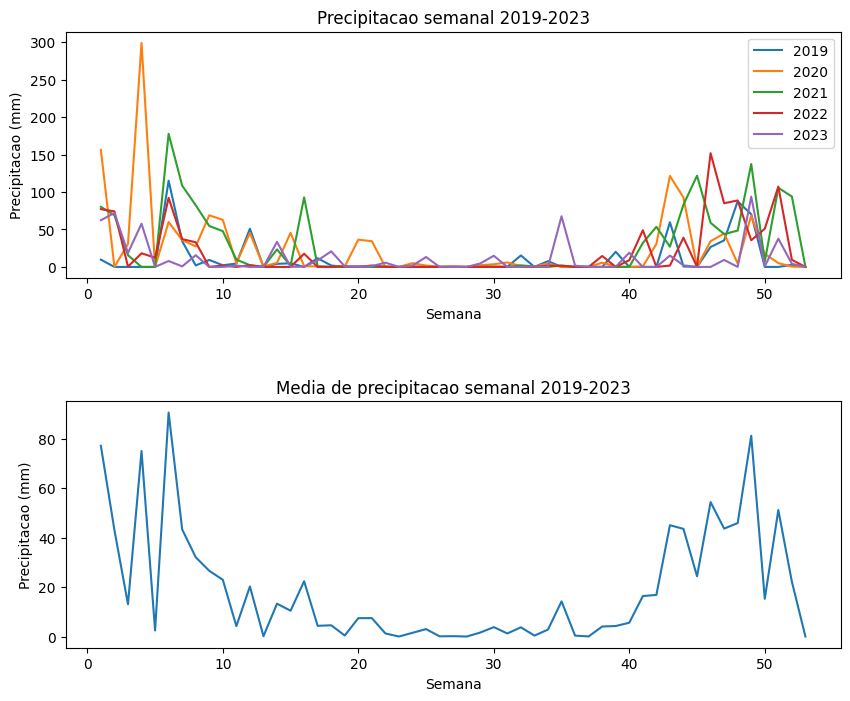

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(weekly_sum1['week'], weekly_sum1['precipitacao(mm)'], label='2019')
plt.plot(weekly_sum2['week'], weekly_sum2['precipitacao(mm)'], label='2020')
plt.plot(weekly_sum3['week'], weekly_sum3['precipitacao(mm)'], label='2021')
plt.plot(weekly_sum4['week'], weekly_sum4['precipitacao(mm)'], label='2022')
plt.plot(weekly_sum5['week'], weekly_sum5['precipitacao(mm)'], label='2023')
plt.title('Precipitacao semanal 2019-2023')
plt.xlabel('Semana')
plt.ylabel('Precipitacao (mm)')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(avg_precipitation1['week'], avg_precipitation1['precipitacao(mm)'], label='2019-2023')
plt.title('Media de precipitacao semanal 2019-2023')
plt.xlabel('Semana')
plt.ylabel('Precipitacao (mm)')
plt.subplots_adjust(hspace=0.5)
plt.show()

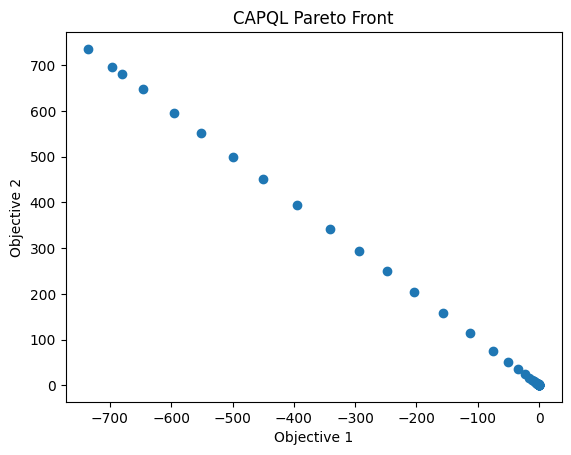

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

CAPQL = pd.read_csv('CAPQL_values_pareto.csv')
plt.scatter(CAPQL['objective_1'], CAPQL['objective_2'])
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('CAPQL Pareto Front')
plt.show()

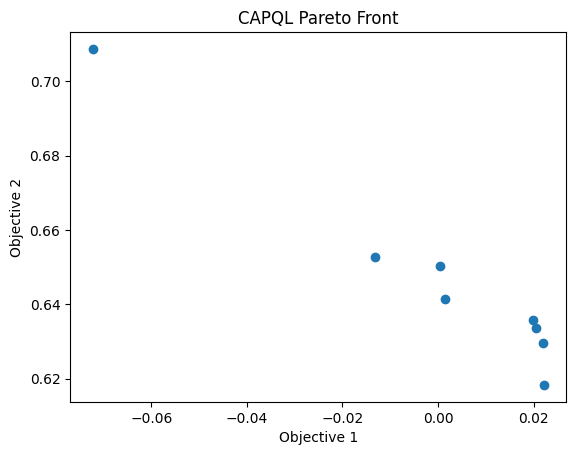

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

PGMORL = pd.read_csv('PGMORL_values_pareto.csv')
plt.scatter(PGMORL['objective_1'], PGMORL['objective_2'])
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('CAPQL Pareto Front')
plt.show()